In [8]:
from pyscipopt import Model, quicksum
from util import multidict

def prodmix(I, K, a, p, epsilon, LB):
    """prodmix:  robust production planning using soco
    Parameters:
        I - set of materials
        K - set of components
        a[i][k] -  coef. matrix
        p[i] - price of material i
        LB[k] - amount needed for k
    Returns a model, ready to be solved.
    """

    model = Model("robust product mix")
    x, rhs = {}, {}
    for i in I:
        x[i] = model.addVar(name=f"x({i})")
    for k in K:
        rhs[k] = model.addVar(name=f"rhs({i})")

    model.addCons(quicksum(x[i] for i in I) == 1)
    for k in K:
        model.addCons(rhs[k] == -LB[k] + quicksum(a[i, k] * x[i] for i in I))
        model.addCons(
            quicksum(epsilon * epsilon * x[i] * x[i] for i in I) <= rhs[k] * rhs[k]
        )

    model.setObjective(quicksum(p[i] * x[i] for i in I), sense='minimize')

    #model.__data = x, rhs
    return model


def make_data():
    a = {
        (1, 1): 0.25,
        (1, 2): 0.15,
        (1, 3): 0.2,
        (2, 1): 0.3,
        (2, 2): 0.3,
        (2, 3): 0.1,
        (3, 1): 0.15,
        (3, 2): 0.65,
        (3, 3): 0.05,
        (4, 1): 0.1,
        (4, 2): 0.05,
        (4, 3): 0.8,
    }
    epsilon = 0.01
    I, p = multidict({1: 5, 2: 6, 3: 8, 4: 20})
    K, LB = multidict({1: 0.2, 2: 0.3, 3: 0.2})
    return I, K, a, p, epsilon, LB

In [9]:
I, K, a, p, epsilon, LB = make_data()
obj_list = []
for i in range(5):
    epsilon = i * 0.01
    model = prodmix(I, K, a, p, epsilon, LB)
    model.optimize()
    print("obj:", model.getObjVal())
    x = model.getBestSol()
    print(x)
    obj_list.append(model.getObjVal())

obj:presolving:
 7.1315789473684355
{'x(1)': 0.6052631578947363, 'x(2)': 0.0, 'x(3)': 0.3157894736842106, 'x(4)': 0.07894736842105343, 'rhs(4)': 0.0}
(round 1, fast)       0 del vars, 3 del conss, 0 add conss, 7 chg bounds, 0 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 0 clqs
   (0.0s) symmetry computation started: requiring (bin +, int +, cont +), (fixed: bin -, int -, cont -)
   (0.0s) no symmetry present (symcode time: 0.00)
presolving (2 rounds: 2 fast, 1 medium, 1 exhaustive):
 0 deleted vars, 3 deleted constraints, 0 added constraints, 7 tightened bounds, 0 added holes, 0 changed sides, 0 changed coefficients
 0 implications, 0 cliques
presolved problem has 7 variables (0 bin, 0 int, 0 impl, 7 cont) and 4 constraints
      4 constraints of type <linear>
Presolving Time: 0.00

 time | node  | left  |LP iter|LP it/n|mem/heur|mdpt |vars |cons |rows |cuts |sepa|confs|strbr|  dualbound   | primalbound  |  gap   | compl. 
* 0.0s|     1 |     0 |     4 |     - |    LP  |   0 |   7 |

In [7]:
obj_list

[7.1315789473684355,
 7.477013882429289,
 7.862008318680805,
 8.228861392496697,
 8.788372400122121]

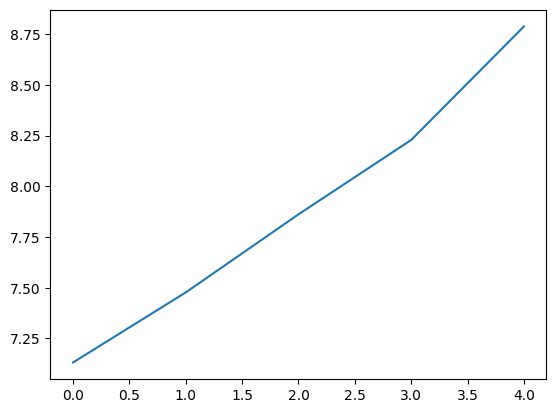

In [11]:
import matplotlib.pyplot as plt

plt.plot(obj_list)

錐制約があるときとないときでSCIPの出力が変化するかどうかを見る

In [12]:
I, K, a, p, epsilon, LB = make_data()
obj_list = []
i=0

epsilon = i * 0.01
model = prodmix(I, K, a, p, epsilon, LB)
model.optimize()
print("obj:", model.getObjVal())
x = model.getBestSol()
print(x)
obj_list.append(model.getObjVal())

obj:presolving:
 7.1315789473684355
{'x(1)': 0.6052631578947363, 'x(2)': 0.0, 'x(3)': 0.3157894736842106, 'x(4)': 0.07894736842105343, 'rhs(4)': 0.0}
(round 1, fast)       0 del vars, 3 del conss, 0 add conss, 7 chg bounds, 0 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 0 clqs
   (0.0s) symmetry computation started: requiring (bin +, int +, cont +), (fixed: bin -, int -, cont -)
   (0.0s) no symmetry present (symcode time: 0.00)
presolving (2 rounds: 2 fast, 1 medium, 1 exhaustive):
 0 deleted vars, 3 deleted constraints, 0 added constraints, 7 tightened bounds, 0 added holes, 0 changed sides, 0 changed coefficients
 0 implications, 0 cliques
presolved problem has 7 variables (0 bin, 0 int, 0 impl, 7 cont) and 4 constraints
      4 constraints of type <linear>
Presolving Time: 0.00

 time | node  | left  |LP iter|LP it/n|mem/heur|mdpt |vars |cons |rows |cuts |sepa|confs|strbr|  dualbound   | primalbound  |  gap   | compl. 
* 0.0s|     1 |     0 |     4 |     - |    LP  |   0 |   7 |

In [13]:
I, K, a, p, epsilon, LB = make_data()
obj_list = []
i=1

epsilon = i * 0.01
model = prodmix(I, K, a, p, epsilon, LB)
model.optimize()
print("obj:", model.getObjVal())
x = model.getBestSol()
print(x)
obj_list.append(model.getObjVal())

presolving:
obj: 7.477013882429289
{'x(1)': 0.5324045158747794, 'x(2)': 0.052938366080576456, 'x(3)': 0.31631510452674577, 'x(4)': 0.09834201351789836, 'rhs(4)': 0.006264105823669539}
(round 1, fast)       0 del vars, 0 del conss, 0 add conss, 7 chg bounds, 0 chg sides, 0 chg coeffs, 0 upgd conss, 0 impls, 0 clqs
   (0.0s) symmetry computation started: requiring (bin +, int +, cont +), (fixed: bin -, int -, cont -)
   (0.0s) no symmetry present (symcode time: 0.00)
presolving (2 rounds: 2 fast, 1 medium, 1 exhaustive):
 0 deleted vars, 0 deleted constraints, 0 added constraints, 7 tightened bounds, 0 added holes, 0 changed sides, 0 changed coefficients
 0 implications, 0 cliques
presolved problem has 7 variables (0 bin, 0 int, 0 impl, 7 cont) and 7 constraints
      4 constraints of type <linear>
      3 constraints of type <nonlinear>
Presolving Time: 0.00

 time | node  | left  |LP iter|LP it/n|mem/heur|mdpt |vars |cons |rows |cuts |sepa|confs|strbr|  dualbound   | primalbound  |  ga

出力の制御: `model.hideOutput()` でソルバの出力をなくせる

In [18]:
I, K, a, p, epsilon, LB = make_data()
obj_list = []
i=1

epsilon = i * 0.01
model = prodmix(I, K, a, p, epsilon, LB)
model.hideOutput()
model.optimize()
print("obj:", model.getObjVal())
x = model.getBestSol()
print(x)
obj_list.append(model.getObjVal())

obj: 7.477013882429289
{'x(1)': 0.5324045158747794, 'x(2)': 0.052938366080576456, 'x(3)': 0.31631510452674577, 'x(4)': 0.09834201351789836, 'rhs(4)': 0.006264105823669539}
